# **Workflow**

0. Import importandt libraries
1. Get data ready (turn into tensors)
2. Build A Linear Regression Model
3. Pick A loss function and optimizer
4. Build a training loop
5. Evaulate your model
6. Test Model with a new data point
7. Save the model

## **0. import Important libraries**

In [115]:
import torch
import torch.optim as optim
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib


## **1. Get data ready (turn into tensors)**

In [116]:
# Load dataset
tips = sns.load_dataset('tips')

In [117]:
# Prepare the data
x = tips['total_bill'].values.reshape(-1, 1)
y = tips['tip'].values.reshape(-1, 1)

In [118]:
# Normalize data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_normalized = scaler_x.fit_transform(x)
y_normalized = scaler_y.fit_transform(y)

In [119]:
# Save scaler objects
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

In [120]:
# Convert to tensors
x_tensor = torch.tensor(x_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y_normalized, dtype=torch.float32)

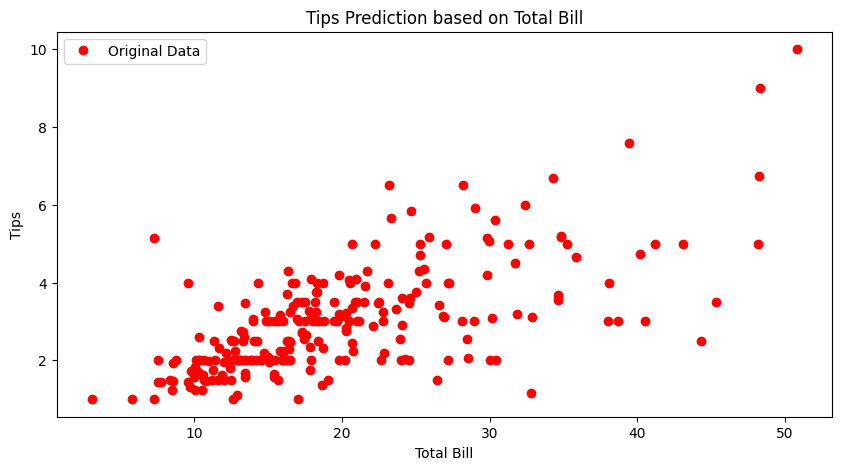

In [121]:
# Plot the original data
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, 'ro', label='Original Data')
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.legend()
plt.title('Tips Prediction based on Total Bill')
plt.show()

## **2. Build a linear Regression Model**

In [122]:
# Define the Linear Regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


In [123]:
# Instantiate the model
model = LinearRegression()

## **3. Pick a Loss function and Optimizer**


In [124]:
# Define loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## **4. Build a training loop**

In [125]:
# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    out = model(x_tensor)
    loss = criterion(out, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:  # Adjusted logging frequency
        print(f'Epoch: [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}')


Epoch: [20/1000], Loss: 0.609022
Epoch: [40/1000], Loss: 0.572639
Epoch: [60/1000], Loss: 0.556422
Epoch: [80/1000], Loss: 0.549195
Epoch: [100/1000], Loss: 0.545974
Epoch: [120/1000], Loss: 0.544538
Epoch: [140/1000], Loss: 0.543898
Epoch: [160/1000], Loss: 0.543613
Epoch: [180/1000], Loss: 0.543486
Epoch: [200/1000], Loss: 0.543429
Epoch: [220/1000], Loss: 0.543404
Epoch: [240/1000], Loss: 0.543392
Epoch: [260/1000], Loss: 0.543387
Epoch: [280/1000], Loss: 0.543385
Epoch: [300/1000], Loss: 0.543384
Epoch: [320/1000], Loss: 0.543384
Epoch: [340/1000], Loss: 0.543384
Epoch: [360/1000], Loss: 0.543383
Epoch: [380/1000], Loss: 0.543383
Epoch: [400/1000], Loss: 0.543383
Epoch: [420/1000], Loss: 0.543383
Epoch: [440/1000], Loss: 0.543383
Epoch: [460/1000], Loss: 0.543383
Epoch: [480/1000], Loss: 0.543383
Epoch: [500/1000], Loss: 0.543383
Epoch: [520/1000], Loss: 0.543383
Epoch: [540/1000], Loss: 0.543383
Epoch: [560/1000], Loss: 0.543383
Epoch: [580/1000], Loss: 0.543383
Epoch: [600/1000],

## **5. Evaluate the model**

In [126]:
# Evaluation
model.eval()
with torch.no_grad():
    predictions_normalized = model(x_tensor).numpy()
    predictions = scaler_y.inverse_transform(predictions_normalized)

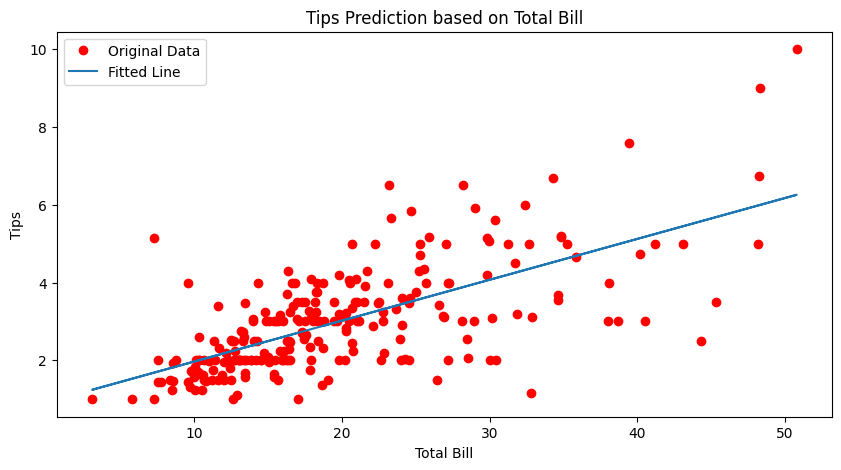

In [127]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'ro', label='Original Data')
plt.plot(x, predictions, label='Fitted Line')
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.legend()
plt.title('Tips Prediction based on Total Bill')
plt.show()

## **6. Test model with new data point**

In [128]:
# Predict for a new total bill value
new_total_bill = 40


In [129]:
# Load scaler objects
scaler_x = joblib.load('scaler_x.pkl')
scaler_y = joblib.load('scaler_y.pkl')

new_total_bill_normalized = scaler_x.transform([[new_total_bill]])
new_total_bill_tensor = torch.tensor(new_total_bill_normalized, dtype=torch.float32)

with torch.no_grad():
    new_tip_normalized = model(new_total_bill_tensor).item()
    new_tip = scaler_y.inverse_transform([[new_tip_normalized]])[0, 0]

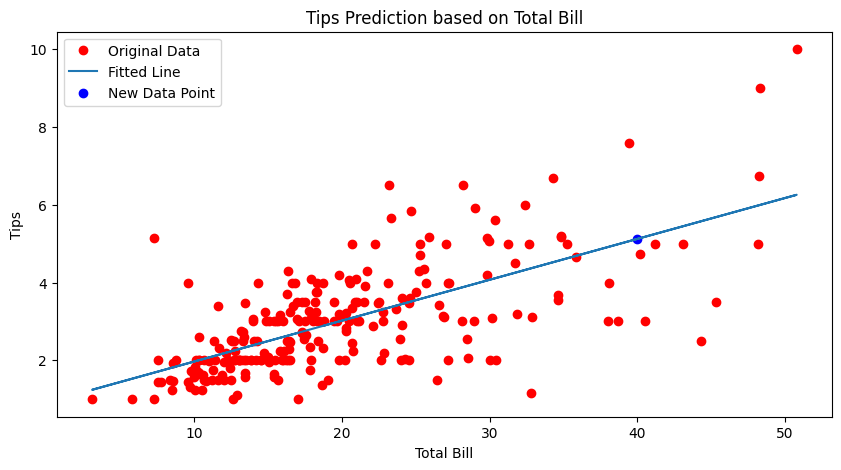

Predicted tip for a total bill of 40 is: 5.121245646728552


In [130]:
# Plot the new prediction
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, 'ro', label='Original Data')
plt.plot(x, predictions, label='Fitted Line')
plt.scatter([new_total_bill], [new_tip], color='blue', label='New Data Point')
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.legend()
plt.title('Tips Prediction based on Total Bill')
plt.show()

# Print the new predicted tip
print(f'Predicted tip for a total bill of {new_total_bill} is: {new_tip}')

**7. Save the model**

In [131]:
# torch.save(model.state_dict(),'./linearRegression.pth')